In [1]:
# Created 2016, Zack Gainsforth
%pylab inline

import sys, os
import QuickPlot
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6  # that's default image size for this interactive session
import glob2 as glob


Populating the interactive namespace from numpy and matplotlib


/Users/Zack/anaconda/envs/conda36/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


mbare=-0.322281
mscreen=-0.151824
Uscf=3.483684


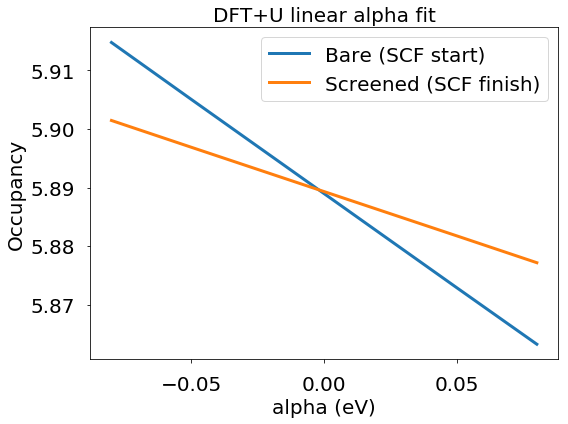

In [2]:
# Example from http://hjklol.mit.edu/content/calculating-hubbard-u
# Using MnO, with U=0 and alpha -0.08 to 0.08

# alpha, SCF start, SCF end
x = np.array([[-0.08, 5.914787, 5.901457],
              [-0.05, 5.905068, 5.896886],
              [ 0.05, 5.872840, 5.881723],
              [ 0.08, 5.863222, 5.877153]
              ])
fig,ax = QuickPlot.QuickPlot(x[:,0], x[:,1], boldlevel=3)
QuickPlot.QuickPlot(x[:,0], x[:,2], boldlevel=3,
         figax=(fig,ax),
         title='DFT+U linear alpha fit',
         xlabel='alpha (eV)',
         ylabel='Occupancy',
         legendstrs=['Bare (SCF start)', 'Screened (SCF finish)'])

mbare,bbare = np.polyfit(x[:,0], x[:,1], 1)
mscreen,bscreen = np.polyfit(x[:,0], x[:,2], 1)

print('mbare=%f'%mbare)
print('mscreen=%f'%mscreen)
print('Uscf=%f'%(1/mbare - 1/mscreen))



In [26]:
# Read the Hubbard U linear alpha response out of the .out files.
# List them.
OutFiles = glob.glob('NiO-HubbardAlpha*.out')

def ReadOneHubbardUOutFile(FileName):
    # Go through an output file from a Hubbard U + alpha output file
    # and get the alpha, bare occupancy and screened occupancy.
    
    with open(FileName, 'r') as f:
        # There are three lines which give N of occupied +U levels.  Count as we go.
        whichocc = 0
        
        # Loop through the file.
        lines = f.readlines()
        for line in lines:
            
            # Check for alpha.
            if 'alpha(' in line:
                _,alpha = line.split('=')
                alpha = float(alpha)
                
            # Check for occupancy.
            if 'N of occupied +U levels ' in line:
                _,occ = line.split('=')
                occ = float(occ)
                # 0 is before the first SCF iteration.
                if whichocc ==0:
                    loadedocc = occ
                # 1 is the first SCF iteration, i.e. bare.
                if whichocc ==1:
                    bareocc = occ
                # 2 is after the full SCF, i.e. screened.
                if whichocc ==2:
                    screenedocc = occ
                whichocc += 1

    if np.abs((bareocc-loadedocc)/loadedocc) > 0.01:
        print('Warning!  Bare occupancy and loaded occupancy differ by more than 1%.  This may indicate that the calculation started out too far from convergence.  Check that you loaded the wavefunction from a previous scf.')

    return [alpha, bareocc, screenedocc]

LinearResponseValues = list()
print('Getting linear reponse values from:')
print('(filename: [alpha, bare, screened])')
for o in OutFiles:
    print(o, end=':\t\t')
    result = ReadOneHubbardUOutFile(o)
    print(ReadOneHubbardUOutFile(o))
    LinearResponseValues.append(result)

# Turn that into a numpy array for the plotting below and sort the values by alpha.
LinearResponseValues = np.array(LinearResponseValues)
LinearResponseValues = LinearResponseValues[LinearResponseValues[:,0].argsort()]

Getting linear reponse values from:
(filename: [alpha, bare, screened])
NiO-HubbardAlpha--0.000.out:		[-0.0, 8.688439, 8.690556]
NiO-HubbardAlpha--0.010.out:		[-0.01, 8.690271, 8.6913]
NiO-HubbardAlpha--0.020.out:		[-0.02, 8.692104, 8.692105]
NiO-HubbardAlpha--0.030.out:		[-0.03, 8.693938, 8.692952]
NiO-HubbardAlpha--0.040.out:		[-0.04, 8.695773, 8.693691]
NiO-HubbardAlpha--0.050.out:		[-0.05, 8.697608, 8.694446]
NiO-HubbardAlpha--0.060.out:		[-0.06, 8.699445, 8.695203]
NiO-HubbardAlpha--0.070.out:		[-0.07, 8.701283, 8.695959]
NiO-HubbardAlpha--0.080.out:		[-0.08, 8.703121, 8.696714]
NiO-HubbardAlpha--0.090.out:		[-0.09, 8.704961, 8.697468]
NiO-HubbardAlpha--0.100.out:		[-0.1, 8.706801, 8.698219]
NiO-HubbardAlpha-0.010.out:		[0.01, 8.686608, 8.689789]
NiO-HubbardAlpha-0.020.out:		[0.02, 8.684778, 8.689015]
NiO-HubbardAlpha-0.030.out:		[0.03, 8.682949, 8.688237]
NiO-HubbardAlpha-0.040.out:		[0.04, 8.681122, 8.687456]
NiO-HubbardAlpha-0.050.out:		[0.05, 8.679295, 8.686672]
NiO-HubbardAlp

mbare=-0.183058
mscreen=-0.077678
Uscf=7.410880


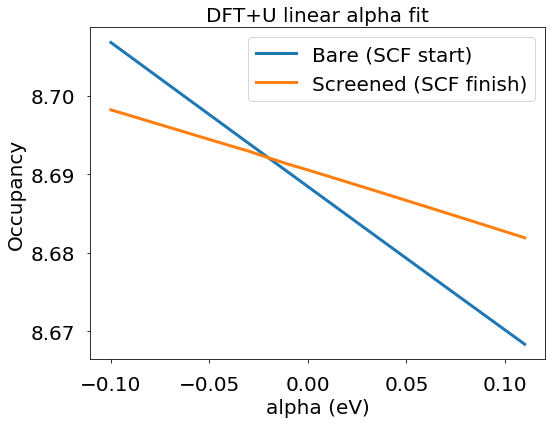

In [31]:
# Ni in NiO

# alpha, SCF start, SCF end
x= LinearResponseValues
# x = np.array([[-0.05, 8.694105, 8.688330],
#               [-0.03, 8.690243, 8.686773],
#               [-0.01, 8.686388, 8.685218],
#               [0.01, 8.682538, 8.683637],
#               [0.03, 8.678695, 8.682088],
#               [0.05, 8.674857, 8.680525],
#              ])
fig,ax = QuickPlot.QuickPlot(x[:,0], x[:,1], boldlevel=3)
QuickPlot.QuickPlot(x[:,0], x[:,2], boldlevel=3,
         figax=(fig,ax),
         title='DFT+U linear alpha fit',
         xlabel='alpha (eV)',
         ylabel='Occupancy',
         legendstrs=['Bare (SCF start)', 'Screened (SCF finish)'])

mbare,bbare = np.polyfit(x[:,0], x[:,1], 1)
mscreen,bscreen = np.polyfit(x[:,0], x[:,2], 1)

print('mbare=%f'%mbare)
print('mscreen=%f'%mscreen)
print('Uscf=%f'%(1/mbare - 1/mscreen))

